In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('mushroom.csv')


In [24]:
# Drop the unnamed index column
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Display first few rows and data info
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [26]:
# Basic statistics for numeric features
print(df.describe())


       stalk_height  cap_diameter
count   2000.000000   2000.000000
mean       8.449118     12.314345
std        3.697217      7.048845
min        2.000000      1.000000
25%        5.291009      5.723521
50%        8.318596     12.124902
75%       11.781272     18.698605
max       15.095066     25.000054


In [28]:
# Check class distribution
print(df['class'].value_counts())

class
poisonous    1400
edible        600
Name: count, dtype: int64


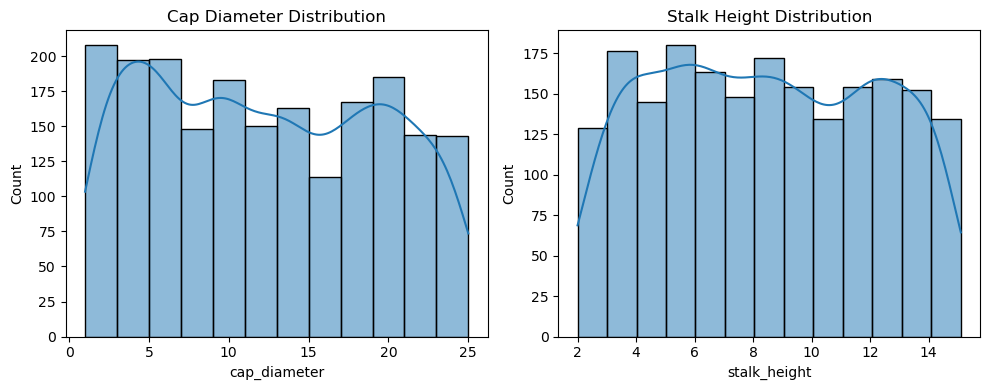

In [29]:
# Visualize distributions of numeric features
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=df, x='cap_diameter', ax=axes[0], kde=True).set_title('Cap Diameter Distribution')
sns.histplot(data=df, x='stalk_height', ax=axes[1], kde=True).set_title('Stalk Height Distribution')
plt.tight_layout()


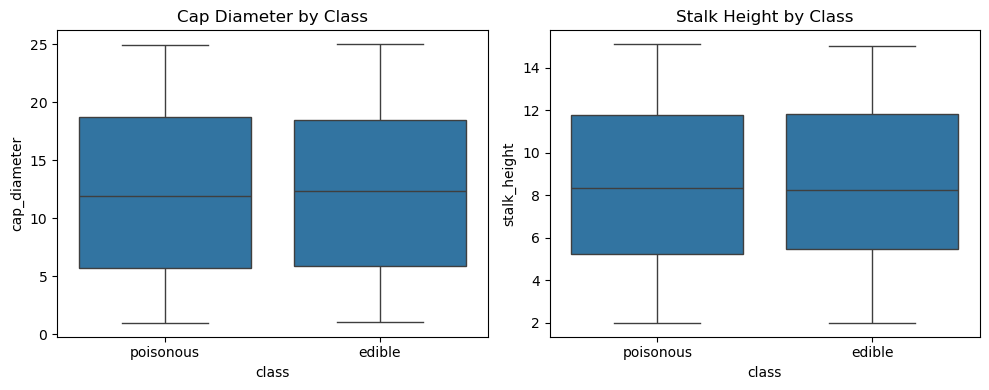

In [30]:
# Boxplots of numeric features by class to see differences
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.boxplot(x='class', y='cap_diameter', data=df, ax=axes[0]).set_title('Cap Diameter by Class')
sns.boxplot(x='class', y='stalk_height', data=df, ax=axes[1]).set_title('Stalk Height by Class')
plt.tight_layout()


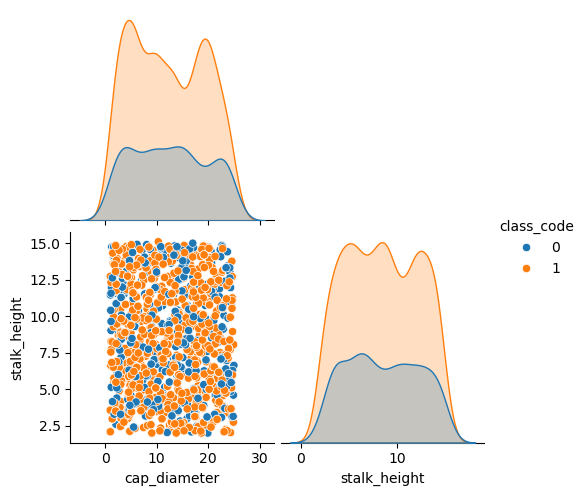

In [31]:
# Pairwise scatterplot for numeric features colored by class
df_plot = df.copy()
df_plot['class_code'] = df_plot['class'].map({'edible':0, 'poisonous':1})
sns.pairplot(df_plot, vars=['cap_diameter','stalk_height'], hue='class_code', corner=True)
plt.show()


In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode target class
le = LabelEncoder()
y = le.fit_transform(df['class'])  # 0=edible, 1=poisonous

# One-hot encode categorical features
X = pd.get_dummies(df.drop('class', axis=1))

X

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,14.276173,5.054983,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,3.952715,19.068319,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,9.054265,7.205884,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,5.226499,20.932692,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,14.037532,12.545245,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.877891,17.464145,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1996,6.500840,13.501957,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1997,13.558064,11.270020,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1998,11.092703,8.423199,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


Resampled dataset shape (SMOTE): Counter({1: 1400, 0: 1400})


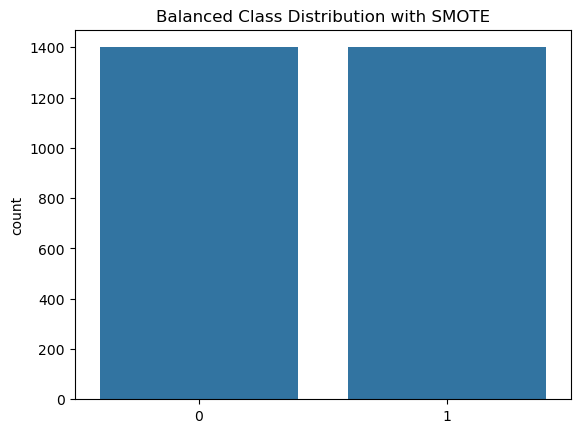

In [51]:
from imblearn.over_sampling import SMOTE
import numpy as np
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled dataset shape (SMOTE):", Counter(y_resampled))
sns.countplot(x=y_resampled)
plt.title("Balanced Class Distribution with SMOTE")
plt.show()


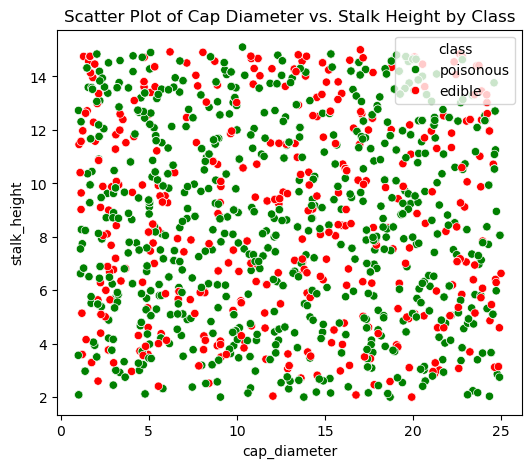

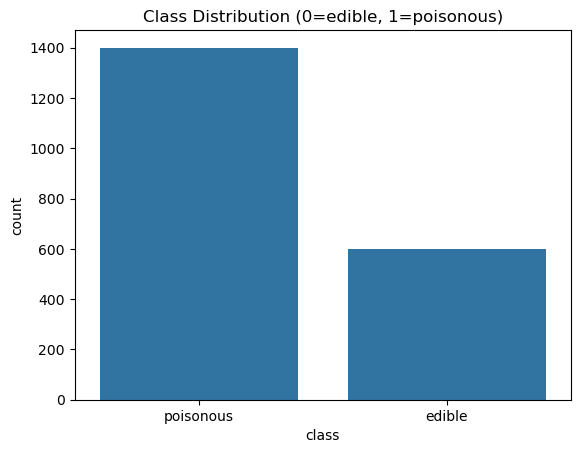

In [54]:
# Scatter plot of the two numeric features, colored by class
plt.figure(figsize=(6,5))
sns.scatterplot(x='cap_diameter', y='stalk_height', hue=df_plot['class'], data=df_plot, palette=['green','red'])
plt.title('Scatter Plot of Cap Diameter vs. Stalk Height by Class')
plt.show()

# Class distribution bar plot
sns.countplot(x='class', data=df)
plt.title('Class Distribution (0=edible, 1=poisonous)')
plt.show()


In [53]:
from sklearn.model_selection import train_test_split

# Train-test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("Training set size:", X_train.shape, "Testing set size:", X_test.shape)


Training set size: (2240, 126) Testing set size: (560, 126)


In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train SVM classifier (RBF kernel by default)
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on test data
y_pred = svm_clf.predict(X_test)

In [56]:
# Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['edible','poisonous']))

Accuracy: 0.74
Precision: 0.66
Recall: 0.99
F1-score: 0.79

Classification Report:
               precision    recall  f1-score   support

      edible       0.98      0.49      0.66       280
   poisonous       0.66      0.99      0.79       280

    accuracy                           0.74       560
   macro avg       0.82      0.74      0.72       560
weighted avg       0.82      0.74      0.72       560



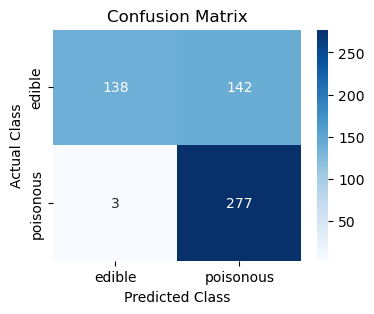

In [57]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['edible','poisonous'], yticklabels=['edible','poisonous'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')
plt.show()


In [60]:
#Parameter Tuning and Optimization

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # relevant only for poly
}

grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_svm = grid.best_estimator_



Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}


In [61]:
# Evaluate tuned model
y_pred_opt = best_svm.predict(X_test)
acc_opt = accuracy_score(y_test, y_pred_opt)
prec_opt = precision_score(y_test, y_pred_opt)
rec_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)

print(f"Tuned SVM Accuracy: {acc_opt:.2f}")
print(f"Tuned Precision: {prec_opt:.2f}")
print(f"Tuned Recall: {rec_opt:.2f}")
print(f"Tuned F1-score: {f1_opt:.2f}")


Tuned SVM Accuracy: 0.91
Tuned Precision: 0.90
Tuned Recall: 0.91
Tuned F1-score: 0.91


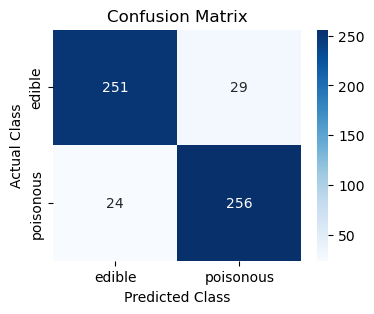

In [62]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['edible','poisonous'], yticklabels=['edible','poisonous'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')
plt.show()


In [64]:
#Comparison and Analysis

kernels = ['linear', 'rbf', 'poly']
for k in kernels:
    clf = SVC(kernel=k, C=10, gamma='auto', degree=3, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"Kernel: {k:6s} -> Test Accuracy: {score:.3f}")


Kernel: linear -> Test Accuracy: 0.752
Kernel: rbf    -> Test Accuracy: 0.882
Kernel: poly   -> Test Accuracy: 0.905


In [66]:
# Detailed comparison of metrics for each kernel
for k in kernels:
    clf = SVC(kernel=k, C=10, gamma='auto', degree=3, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f"\nKernel: {k}")
    print(classification_report(y_test, pred, target_names=['edible','poisonous']))



Kernel: linear
              precision    recall  f1-score   support

      edible       0.82      0.65      0.72       280
   poisonous       0.71      0.86      0.78       280

    accuracy                           0.75       560
   macro avg       0.76      0.75      0.75       560
weighted avg       0.76      0.75      0.75       560


Kernel: rbf
              precision    recall  f1-score   support

      edible       0.90      0.86      0.88       280
   poisonous       0.86      0.91      0.89       280

    accuracy                           0.88       560
   macro avg       0.88      0.88      0.88       560
weighted avg       0.88      0.88      0.88       560


Kernel: poly
              precision    recall  f1-score   support

      edible       0.91      0.90      0.90       280
   poisonous       0.90      0.91      0.91       280

    accuracy                           0.91       560
   macro avg       0.91      0.91      0.91       560
weighted avg       0.91      0.

In [67]:
#SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results:

#We compare SVM performance across kernels. For example, a linear kernel SVM may train faster and work well if data is mostly linearly separable, 
#while an RBF or polynomial kernel can capture non-linear boundaries by mapping features into higher-dimensional space.
#We can train separate SVMs with each kernel and compare metrics. This reveals which kernel handles the mushroom data best.
#We also analyze strengths/weaknesses using insights from EDA: if classes overlap significantly, a non-linear kernel may perform better.

In [68]:
#real-world uses of SVMs: they are effective for many classification problems like image or text classification and bioinformatics,
#especially when the number of features is large relative to samples.
#SVMs work well on moderately-sized datasets and can model complex patterns via kernels, but they can be memory-intensive with very large datasets or many one-hot features.

In [72]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
best_svm= SVC(kernel='poly', random_state=42, gamma='auto',C = 3, degree=10)
best_svm.fit(X_train, y_train)
# Predict using best SVM from GridSearch
y_pred_pca = best_svm.predict(X_test)

# Create a DataFrame for plotting
import numpy as np
plot_df = pd.DataFrame({
    'PC1': X_test_pca[:, 0],
    'PC2': X_test_pca[:, 1],
    'Actual': y_test,
    'Predicted': y_pred_pca
})


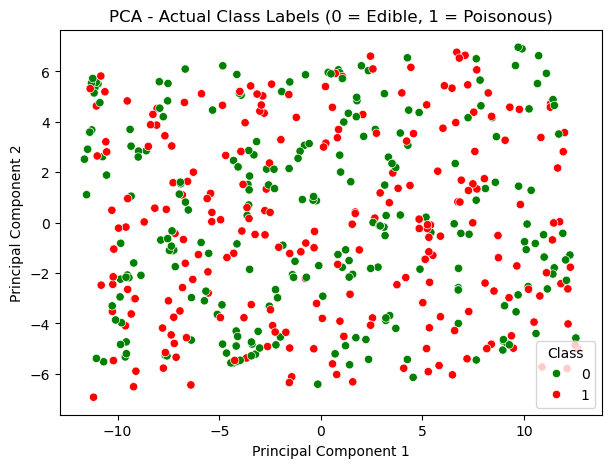

In [73]:
#Actual Class Distribution in PCA Space
plt.figure(figsize=(7,5))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Actual', palette=['green', 'red'])
plt.title('PCA - Actual Class Labels (0 = Edible, 1 = Poisonous)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.show()


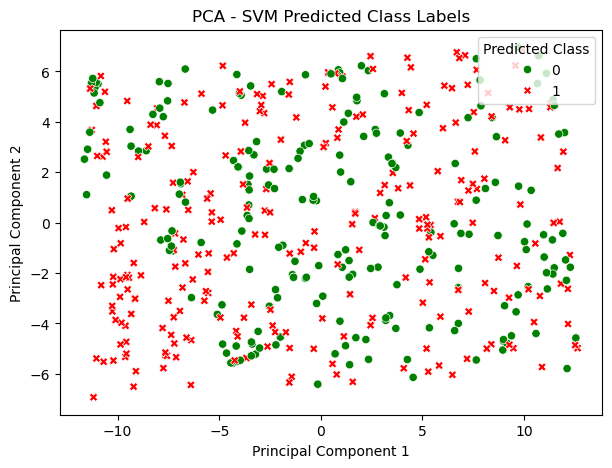

In [74]:
#Predicted Class Distribution by Best SVM
plt.figure(figsize=(7,5))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Predicted', palette=['green', 'red'], style='Predicted')
plt.title('PCA - SVM Predicted Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Predicted Class')
plt.show()
